In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For pretty plots
sns.set(style="whitegrid")


## 1. Load Dataset

We load the dataset containing sales, profit, region, and product categories.

In [16]:
# Try using ISO-8859-1 encoding
df = pd.read_csv("Global_Superstore.csv", encoding='ISO-8859-1')

# Preview the ## 2. 🧹 Data Cleaning

We handle missing values, remove duplicates, and detect outliers using IQR method.

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


## 2. Data Cleaning

We handle missing values, remove duplicates, and detect outliers using IQR method.


In [22]:
# Fill missing values in 'Profit' column using median — the correct and future-proof way
df['Profit'] = df['Profit'].fillna(df['Profit'].median())

# Check if there are still any missing values
print("Missing values in 'Profit':", df['Profit'].isnull().sum())


Missing values in 'Profit': 0


In [26]:
df.drop_duplicates(inplace=True)

In [29]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Remove outliers from numerical columns
df = remove_outliers_iqr(df, 'Sales')
df = remove_outliers_iqr(df, 'Profit')

## 3. Statistical Analysis

We compute mean, median, standard deviation, variance, and correlation to understand the distribution and relationships.

In [30]:
print("Mean Sales:", df['Sales'].mean())
print("Median Sales:", df['Sales'].median())
print("Standard Deviation (Profit):", df['Profit'].std())
print("Variance (Profit):", df['Profit'].var())

# Correlation Matrix
correlation_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
print(correlation_matrix)


Mean Sales: 49.60100760342665
Median Sales: 37.86
Standard Deviation (Profit): 11.402201413630221
Variance (Profit): 130.010197076991
             Sales    Profit  Quantity  Discount
Sales     1.000000  0.458194  0.266258 -0.246886
Profit    0.458194  1.000000  0.166251 -0.589744
Quantity  0.266258  0.166251  1.000000 -0.019800
Discount -0.246886 -0.589744 -0.019800  1.000000


## 4.  Data Visualization

We use various plots to visually explore the data.
- Histogram: Sales Distribution  
- Boxplot: Profit Outliers  
- Heatmap: Correlation Matrix  

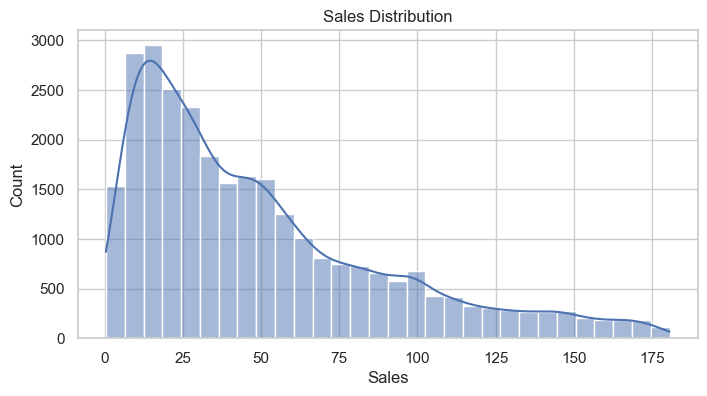

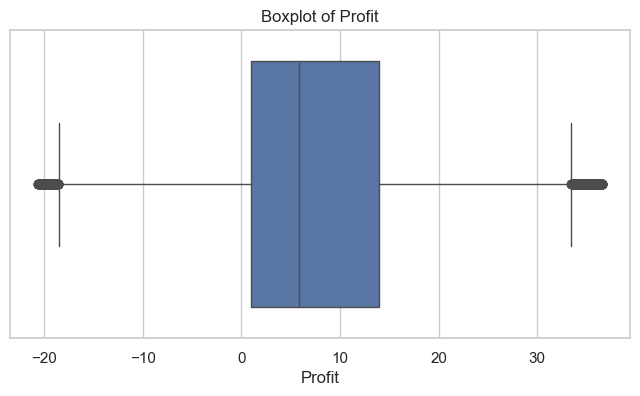

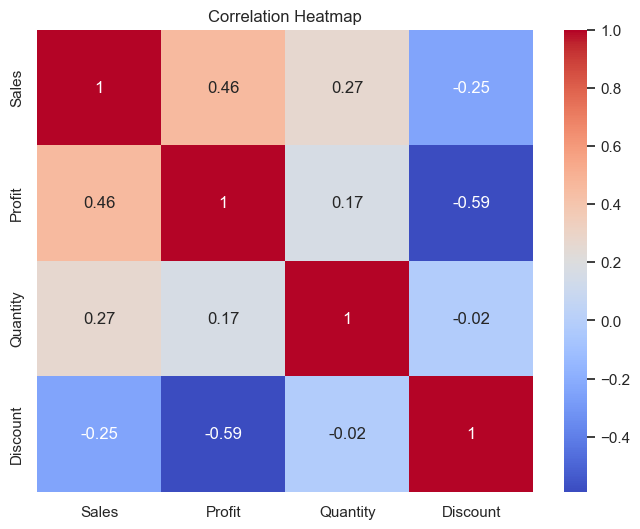

In [31]:
# Histogram: Sales
plt.figure(figsize=(8, 4))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

# Boxplot: Profit
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit')
plt.show()

# Heatmap: Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
